<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/3-3%20%ED%8A%B9%EC%84%B1%20%EA%B3%B5%ED%95%99%EA%B3%BC%20%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **특성 공학과 규제**

## **다중 회귀**

**다중 회귀(multiple regression)**는 여러 특성을 사용한 선형 회귀입니다. 특성이 많을수록 좋은 결과값을 내며, 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현합니다. 에컨대 특성이 2개이면 3차원 공간을 형성하고, 선형 회귀는 평면을 학습합니다. 방정식은 아래 형태를 가집니다.

$$타깃 = a \times 특성1 + b \times 특성2 + 절편$$

## **특성 공학**

**특성 공학(feature engineering)**은 존재하는 특성을 사용하여 새로운 특성을 생성하는 작업입니다. 각 특성을 서로 곱해서 또 다른 특성을 생성하는 것입니다. 예컨대 농어 길이와 농어 높이를 곱하여 새로운 특성을 생성할 수 있습니다.

## **데이터 준비**

농어 데이터의 특성이 길이와 높이, 두께까지 3개로 늘어났습니다. 판다스의 `read_csv()` 메서드를 사용하여 데이터를 부르겠습니다.

In [6]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df[:5])

   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94


넘파이 배열로 바꾸겠습니다.

In [9]:
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


농어의 타깃 데이터는 이전 챕터에서 사용했던 동일한 무게 데이터입니다.

In [12]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

훈련 세트와 테스트 세트로 나누겠습니다.

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

print(f'train_input[:5]:\n{train_input[:5]}')
print()
print(f'train_target[:5]:\n{train_target[:5]}')
print()
print(f'test_input[:5]:\n{test_input[:5]}')
print()
print(f'test_target[:5]:\n{test_target[:5]}')

train_input[:5]:
[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]]

train_target[:5]:
[ 85. 135.  78.  70. 700.]

test_input[:5]:
[[ 8.4   2.11  1.41]
 [18.    5.22  3.32]
 [27.5   7.28  4.57]
 [21.3   6.38  3.53]
 [22.5   5.86  3.62]]

test_target[:5]:
[  5.9 100.  250.  130.  130. ]


## **사이킷런의 변환기**

**사이킷런(scikit-learn)**은 특성을 만들거나 전처리하기 위한 다양한 클래스인 **변환기(transformer)**를 포함합니다. 사이킷런의 모델 클래스는 `fit()`, `score()`, `predict()` 메서드를 공통적으로 포함하고, 변환기 클래스는 `fit()`, `transform()`메서드를 포함합니다. 변환기 클래스와 메서드는 직접 사용하면서 설명하겠습니다.

### **PolynomialFeatures 클래스**

`PolynomialFeatures` 클래스는 `sklearn.preprocessing` 패키지에 포함되어 있습니다. 각 특성을 제곱한 항을 추가하고, 각 특성끼리 곱한 항을 추가하는 클래스입니다. 관련 매개변수 목록은 아래와 같습니다.

- `degree`: 최고 차수를 정하는 매개변수입니다. 기본값은 `2`입니다.

- `interaction_only`: `True`이면 거듭제곱 항은 제외하고 특성 간 곱셈 항만 추가되도록 지정하는 매개변수합니다. 기본값은 `False`입니다.

- `include_bias`: `False`이면 절편을 위한 특성을 추가하지 않도록 지정하는 매개변수입니다. 기본값은 `True`입니다.

`PolynomialFeatures` 클래스에 특성 2와 3으로 이뤄진 샘플을 적용하겠습니다. 먼저 `PolynomialFeatures()` 클래스 생성자로 `poly` 인스턴스를 선언하겠습니다. `fit()` 메서드로 새롭게 만들 특성 조합을 찾고, `transform()` 메서드로 데이터를 변환하겠습니다.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


특성으로 1, 2, 3과 2의 제곱인 4, 3의 제곱인 9, 2와 3을 곱한 6이 출력되었습니다. 1이 추가된 이유는 선형 방정식의 절편이 항상 값이 1인 특성과 곱해지는 계수이기 때문입니다. 다시 말하면 $무게 = a \times 길이 + b \times 높이 + c \times 두께 + d \times 1$이므로, 특성은 (길이, 높이, 두께, 1)이 됩니다.

`include_bias=False` 매개변수로 지정하여 절편을 제거하겠습니다.

In [18]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


`fit()` 메서드와 `transform()` 메서드를 합친 `fit_transform()` 메서드도 사용할 수 있습니다.

In [19]:
print(poly.fit_transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


이제 같은 방식으로 `train_input`에 적용하겠습니다.

In [22]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
# `train_poly`에 변환한 값을 저장합니다.
train_poly = poly.transform(train_input)

print(f'train_poly[:5]:\n{train_poly[:5]}')
print(train_poly.shape)

train_poly[:5]:
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]]
(42, 9)


`get_feature_names_out()` 메서드를 호출하여 특성 9개가 어떤 특성 조합으로 만들어졌는지 확인하겠습니다.

In [25]:
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


`test_input`도 변환하겠습니다. 이미 `train_input`으로 훈련했기 때문에 `test_input`은 별도로 훈련할 필요가 없습니다. 

In [26]:
test_poly = poly.transform(test_input)
print(test_poly[:5])

[[  8.4      2.11     1.41    70.56    17.724   11.844    4.4521   2.9751
    1.9881]
 [ 18.       5.22     3.32   324.      93.96    59.76    27.2484  17.3304
   11.0224]
 [ 27.5      7.28     4.57   756.25   200.2    125.675   52.9984  33.2696
   20.8849]
 [ 21.3      6.38     3.53   453.69   135.894   75.189   40.7044  22.5214
   12.4609]
 [ 22.5      5.86     3.62   506.25   131.85    81.45    34.3396  21.2132
   13.1044]]


## **다중 회귀 모델 훈련하기**

위에서 생성한 훈련 세트와 테스트 세트로 모델을 훈련하겠습니다.

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


과소적합은 해결되었지만 두 점수간 균형점을 더 찾아보겠습니다. `PolynomialFeatures` 클래스의 `degree` 매개변수로 고차항의 최대 차수를 지정하여 특성을 더 추가하겠습니다.

In [33]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(f'train_poly[0]:\n{train_poly[0]}')
print(train_poly.shape)
print()
print(f'test_poly[0]:\n{test_poly[0]}')
print(test_poly.shape)

train_poly[0]:
[1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
 1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
 9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
 5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
 8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
 3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
 3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
 5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
 1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
 4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
 5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
 1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
 1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
 7.42244501e+02 4.38992857e+02 2.59637799e+02]
(42, 55)

test_poly[0]:
[8.40000000e+00 2.11000000e+00 1.41000000e+00 7.05600000e+01
 1.77240000e+01 1.18440000e+01 4.45210000e+00 2.97510000e+00

특성 55개가 만들어졌습니다.

In [34]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


훈련 세트에 대한 점수는 거의 완벽한 수준입니다. 그러나 테스트 세트에 대한 점수는 음수입니다. 특성의 개수를 늘리면 선형 모델이 매우 강력해지지만 훈련 세트에 지나치게 과대적합됩니다. 특성을 줄일 필요가 있습니다.

### **규제**

**규제(regularization)**는 모델이 훈련 세트를 과하게 학습하지 못하도록(과대적합되지 않도록) 조치하는 작업입니다. 선형 회귀 모델의 경우 계수 크기를 작게 만듭니다.

다만 선형 회귀 모델에 규제를 적용할 때 계수가 많이 다르면 공정하게 제어되지 않습니다. 특성 스케일이 정규화되지 않으면 곱해지는 계수 값도 차이가 나기 때문입니다. 따라서 변환기인 `StandardScaler` 클래스를 사용하여 특성 스케일을 정규화해야 합니다. `StandardScaler` 클래스는 평균과 표준편차를 구하여 표준점수로 변환해주는 클래스입니다.

In [44]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) 

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(f'train_scaled[0]:\n{train_scaled[0]}')
print(train_scaled.shape)
print()
print(f'test_scaled[0]:\n{test_scaled[0]}')
print(test_scaled.shape)

train_scaled[0]:
[-1.01339619 -1.01007487 -1.01952321 -0.9549757  -0.9496784  -0.95745849
 -0.93942079 -0.94342509 -0.94100107 -0.88757122 -0.88399964 -0.89100599
 -0.87785292 -0.88311456 -0.88430909 -0.8691891  -0.87259422 -0.87147928
 -0.86603533 -0.82233944 -0.82171953 -0.8280588  -0.81928269 -0.82512549
 -0.8278857  -0.81486775 -0.82006923 -0.82177279 -0.82010716 -0.80835934
 -0.81274154 -0.81321125 -0.8098514  -0.80275974 -0.7637909  -0.76597773
 -0.77150714 -0.76668667 -0.77246614 -0.77577893 -0.76571689 -0.77162398
 -0.77472752 -0.77517751 -0.76290623 -0.76877311 -0.77148634 -0.77113383
 -0.767785   -0.75814062 -0.76376113 -0.76586966 -0.76449499 -0.75967179
 -0.75143746]
(42, 55)

test_scaled[0]:
[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
 -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
 -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
 -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.924

`StandardScaler` 클래스 객체의 `mean_` 속성에는 평균, `scale_` 속성에는 표준편차가 저장됩니다.

In [40]:
print(f'ss.mean_[:3]: {ss.mean_[:3]}')
print(f'ss.scale_[:3]: {ss.scale_[:3]}')

ss.mean_[:3]: [28.4452381   8.04238095  4.82047619]
ss.scale_[:3]: [8.72831196 2.87343151 1.74638123]


#### **릿지 회귀**

**릿지(ridge)**는 계수를 제곱한 값을 기준으로 규제를 적용한 선형 회귀 모델입니다. 선형 모델의 계수 크기를 줄여서 과대적합을 줄입니다. 일반적으로 아래에서 서술할 **라쏘(lasso)**보다 더 선호되는 모델입니다. `sklearn.linear_model` 패키지에 `Ridge` 클래스가 포함되어 있습니다. 아래는 `Ridge` 클래스가 가진 매개변수 목록입니다.

- `alpha`: 규제 강도를 조절하는 매개변수입니다. 기본값은 `1`입니다.

  - `alpha` 값이 크면 규제 강도가 세지며, 계수 값을 더 줄이고 과소적합됩니다.

  - `alpha` 값이 작으면 규제 강도가 약해지며, 계수 값을 덜 줄이고 과대적합됩니다.

- `solver`: 최적의 모델을 찾기 위한 방법을 지정하는 매개변수입니다. 기본값은 `auto`입니다. 특성과 샘플이 많을 경우엔 `saga`를 지정하여 **확률적 평균 경사 하강법** 알고리즘을 사용합니다. 성능이 빠르고 좋습니다. **4-2 확률적 경사 하강법** 챕터에서 다시 설명하겠습니다.

- `random_state`: `saga`일 경우에 넘파이 난수 시드값을 지정하는 매개변수입니다.

참고로 **하이퍼파라미터(hyperparameter)**는 사람이 직접 지정해야 하는 파라미터입니다. 예컨대 `alpha` 매개변수의 값은 사람이 직접 지정하므로 하이퍼파라미터입니다.



이제 릿지 모델을 훈련하겠습니다. 사이킷런을 사용하는 방법과 동일합니다.

In [58]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {ridge.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {ridge.score(test_scaled, test_target)}')

훈련 세트 점수:   0.9896101671037343
테스트 세트 점수: 0.9790693977615397


과대적합이 해결됐습니다. 하지만 더 적절한 점수를 찾는 과정을 거칠 필요가 있습니다. `alpha` 값을 변경하며 $R^2$ 그래프를 그리고, 훈련 세트 그래프와 테스트 세트 그래프가 가장 가까운 지점을 적절한 `alpha` 값으로 취하겠습니다. 먼저 `alpha` 값을 변경하며 $R^2$를 구하겠습니다.

In [60]:
train_score = []
test_score = []

# 하이퍼파라미터를 지정합니다.
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha_value in alpha_list:
    ridge = Ridge(alpha = alpha_value)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

print(f'훈련 세트 점수:    {train_score}')
print(f'테스트 세트 점수:  {test_score}')

훈련 세트 점수:    [0.9930455252088191, 0.9917809981250537, 0.9903815817570366, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
테스트 세트 점수:  [0.9569388961556662, 0.9800187936873132, 0.9827976465386927, 0.9790693977615397, 0.9725329582461569, 0.9627042641050291]


위에서 찾은 $R^2$를 그래프로 그리겠습니다.

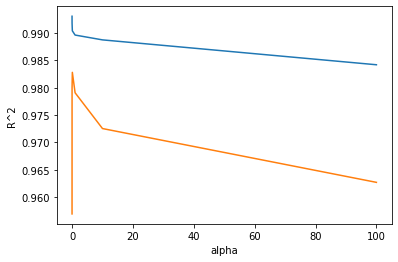

In [51]:
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

`alpha` 값을 0.001부터 10배씩 늘렸으므로 확인해야 할 그래프 왼쪽이 너무 촘촘합니다. `alpha` 값을 동일한 간격으로 나타내기 위해 넘파이의 `log10()` 메서드를 사용하겠습니다. 예컨대 0.001은 -3을 나타내고, 0.01은 -2를 나타내는 식이 됩니다.

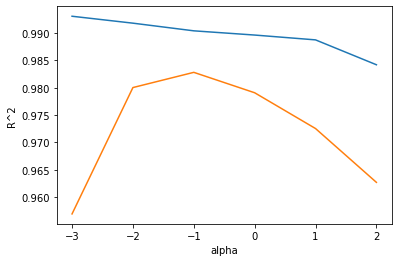

In [52]:
plt.plot(np.log10(alpha_list), train_score) 
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

-3의 경우는 과대적합을 나타내고, 2의 경우는 과소적합(훈련 세트와 테스트 세트 점수가 전부 낮아짐)을 나타냅니다. 적절한 `alpha` 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1인 $10^-1 = 0.1$입니다.

이제 최적의 하이퍼파라미터인 -1로 모델을 훈련하겠습니다.

In [57]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {ridge.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {ridge.score(test_scaled, test_target)}')

훈련 세트 점수:   0.9903815817570366
테스트 세트 점수: 0.9827976465386927


계수는 `_coef` 속성에 저장되어 있습니다.

In [55]:
ridge.coef_

array([ 27.61933479,  -1.64022156, -19.73256036,  30.0306195 ,
        16.99800255,  17.83247301,   4.46928273,   3.87258547,
        22.8351822 ,  19.50417483,  17.75985317,  14.53122144,
        13.34875736,   7.57294011,  19.2573194 ,   5.12766348,
        -2.05671393,  10.62376405,  41.72322888,   5.90722851,
        14.93389276,  -0.4506018 ,  19.86035413,   1.27084276,
        -1.00708878,  19.69043816,  -1.15817017,  -3.57357468,
        11.96629206,  13.68484378,  -8.41738209,  -9.97919956,
         8.42421045,  45.51544903,  -6.23828569,  13.36080282,
       -17.64759601,  28.23566212,  -6.56619234, -25.89115813,
        37.3785331 ,  -0.39779345, -20.82275921, -23.80607786,
        39.96650626,   0.10569722, -20.49768851, -21.74712923,
        -4.12579289,  35.39224119,  -5.59195   , -25.3889504 ,
       -23.93962265,  -1.89229971,  39.44235556])

#### **라쏘 회귀**

**라쏘(lasso)**는 계수의 절댓값을 기준으로 규제를 적용한 선형 회귀 모델입니다. 선형 회귀 모델의 계수 크기를 줄이고, 릿지와는 달리 0으로 만들 수도 있습니다. 계수를 0으로 만들어서 유용한 특성을 골라내는 용도로 사용하기도 합니다.

참고로 좌표축을 따라 최적화를 수행하는 **좌표 하강법(coordinate descent)**을 사용합니다.

`sklearn.linear_model` 패키지에 `Lasso` 클래스가 포함되어 있습니다. `Lasso` 클래스와 `Ridge` 클래스가 가진 매개변수는 아래 매개변수 하나를 제외하면 모두 동일합니다.

- `max_iter`: 알고리즘 수행 반복 횟수를 지정하는 매개변수입니다. 기본값은 `1000`입니다.

이제 라쏘 모델을 훈련하겠습니다. 사이킷런을 사용하는 방법과 동일하며, 릿지 모델과 같은 방식입니다.

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {lasso.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {lasso.score(test_scaled, test_target)}')

훈련 세트 점수:   0.989789897208096
테스트 세트 점수: 0.9800593698421883


과대적합을 해결했습니다. 더 나은 점수를 찾아보겠습니다.

In [62]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha_value in alpha_list :
    lasso = Lasso(alpha = alpha_value, max_iter = 10000)
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

print(train_score)
print(test_score)

[0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


`ConvergenceWarning`이라는 경고가 발생했습니다. 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이 경고가 발생합니다. 반복 횟수를 늘리고자 `max_iter` 매개변수의 값을 10000으로 지정했지만 여전히 반복 횟수가 부족합니다. 필요하다면 더 값을 더 늘릴 수 있습니다.

도출한 점수를 토대로 그래프를 그리겠습니다. 여기에서도 릿지처럼 x축을 로그 스케일로 변환하여 그리겠습니다.

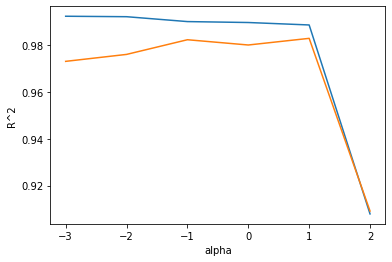

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

-3의 경우는 과대적합, 2의 경우는 과소적합입니다. 최적의 `alpha` 값은 1, 즉 $10^1 = 10$입니다.

In [63]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(f'훈련 세트 점수:   {lasso.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {lasso.score(test_scaled, test_target)}')

훈련 세트 점수:   0.9888067471131867
테스트 세트 점수: 0.9824470598706695


라쏘 모델의 계수는 `coef_` 속성에 저장되어 있습니다. 참고로 라쏘 모델은 계수를 0으로 만들어서 유용한 특성을 골라내는 용도로 사용할 수 있습니다.

In [64]:
print(lasso.coef_ == 0)
print(np.sum(lasso.coef_ == 0))

[ True  True  True False False False  True  True False  True False False
 False False False  True  True False False  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True]
40


`True`는 0을 의미합니다. 계수 0의 합계는 40개입니다. 라쏘 모델이 사용한 특성은 55개 중에 15개뿐입니다. 특성 40개를 계수 0으로 만들어 버렸기 때문입니다. 유용한 특성은 15개라는 의미로도 볼 수 있습니다.